In [20]:
from data.preparation import import_data, get_dtypes, compute_correlation,categorical_variables_selection, encode, normalize,plot_all_histograms,cramers_v_table
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from scipy.stats import chi2_contingency
pd.set_option('display.max_columns', None)



In [21]:
input_path="01_Input_Data/bank-additional-full.csv"
data=import_data(input_path)


In [22]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Nous avons bien 20 colonnes en tout (étant donné que nous avons supprimé la colonne Duration comme demandé)

In [23]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


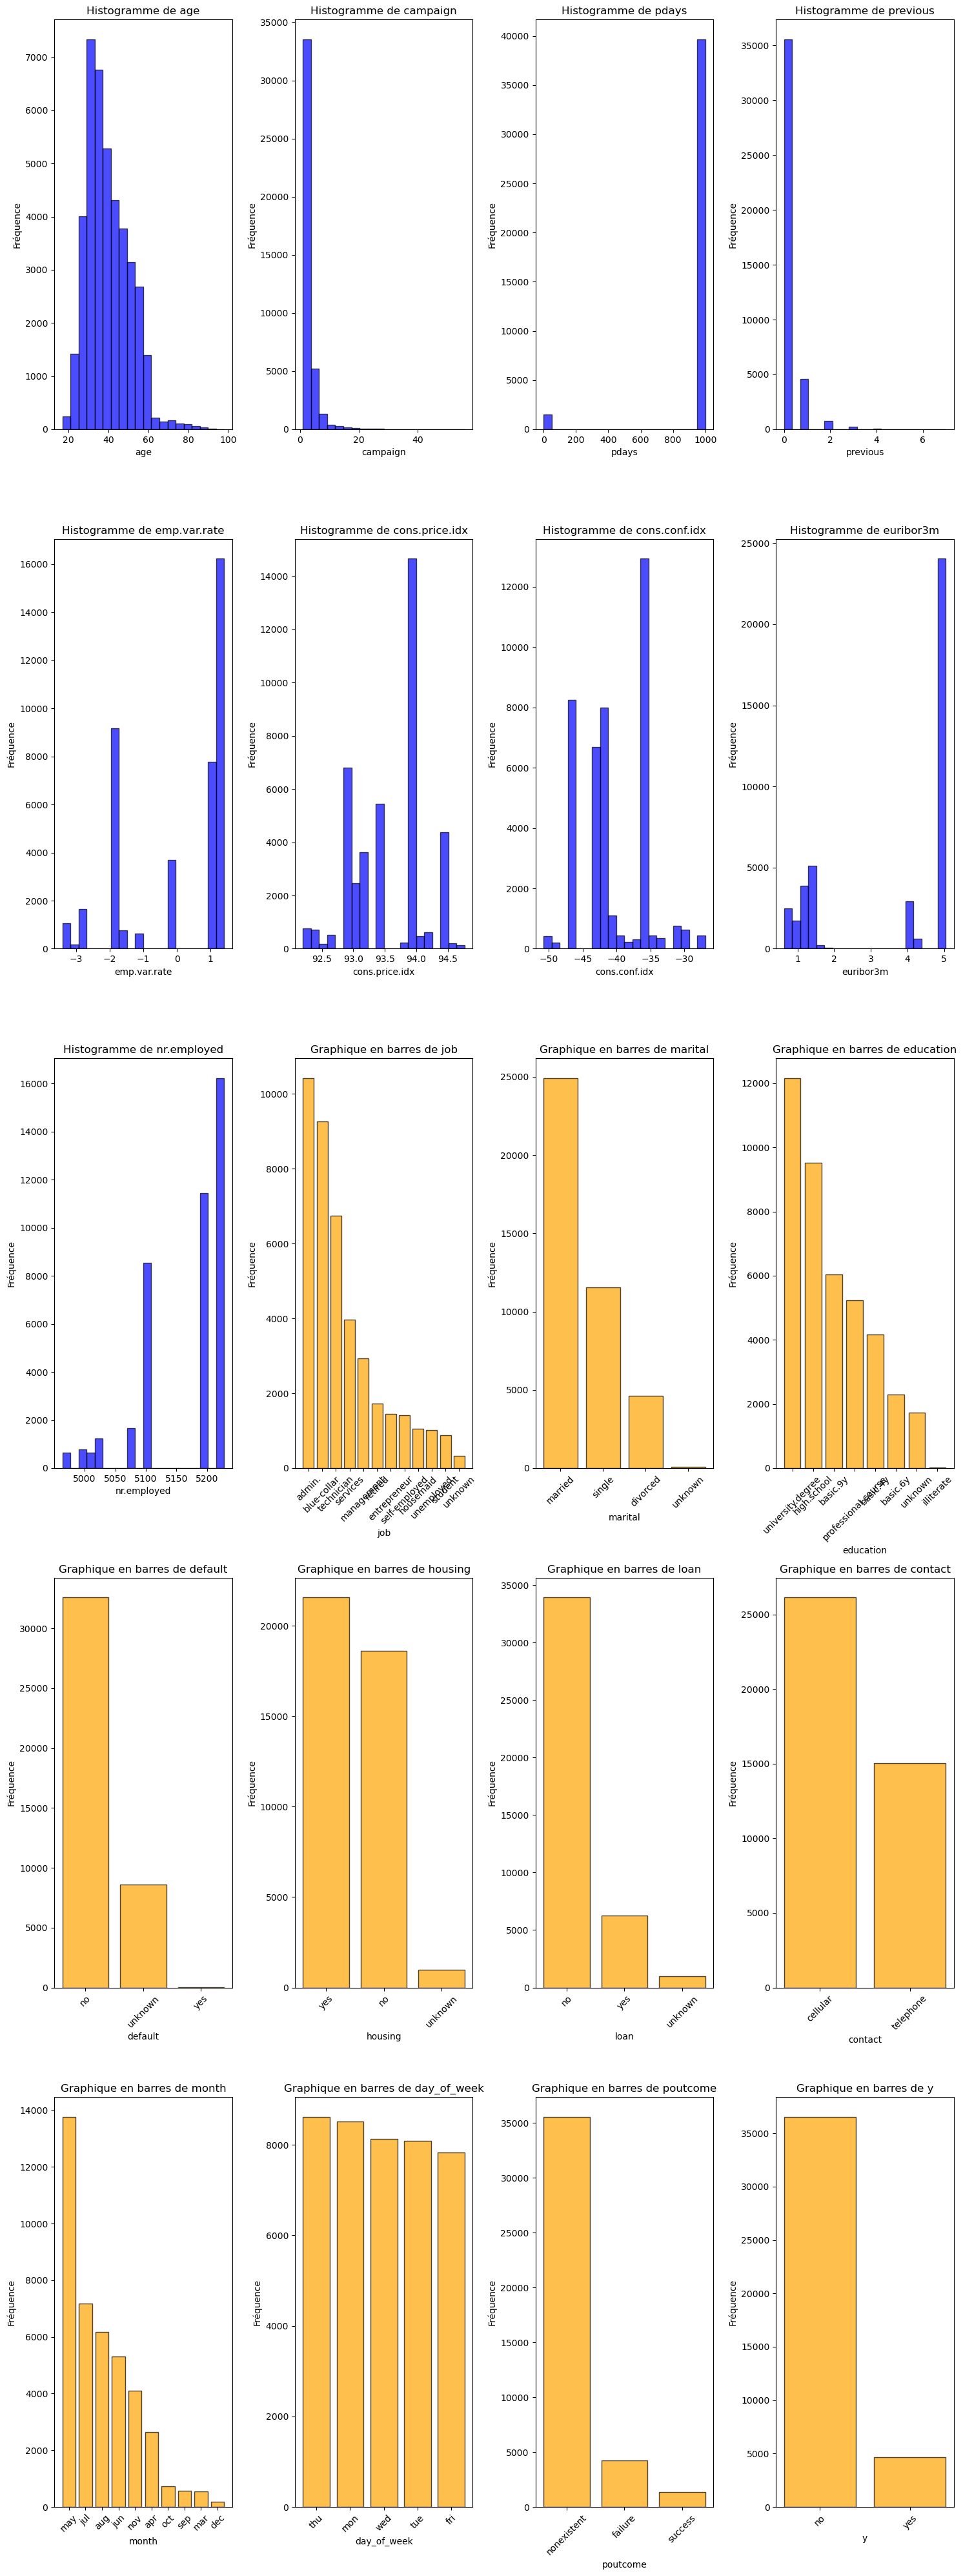

In [24]:
plot_all_histograms(data,bins=20)

On remarque beaucoup d'Uknown présents dans les données catégorielles (en jaune), pour l'instant on les garde mais il faudra tester également de les enlever dans certaines colonnes et de les transformer dans d'autres colonnes

On cherche combien il y a de YES dans la colonne 'Default'. Pour l'instant on teste de la garder

In [25]:
yes_default = data[data['default'] == 'yes']
yes_default

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


In [26]:
dtype_to_column = get_dtypes(data)
dtype_to_column

{dtype('int64'): ['age', 'campaign', 'pdays', 'previous'],
 dtype('float64'): ['emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed'],
 dtype('O'): ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'y']}

# Variables numériques

On va calculer les corrélations et enlever les variables numériques qui sont corrélées à plus de 0.7 

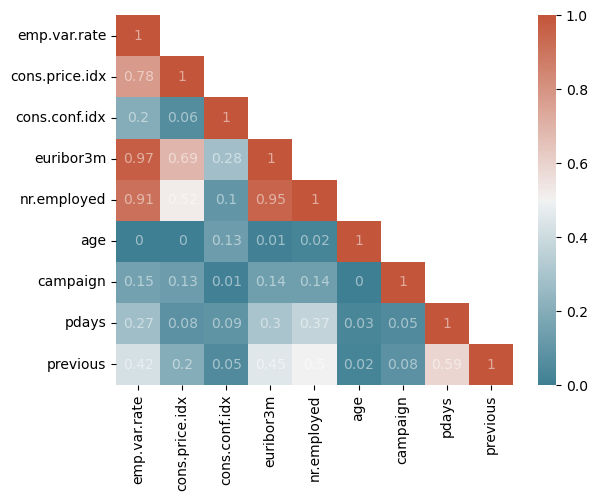

In [27]:
correlation = compute_correlation(data=data)

In [28]:
#data = variables_selection(correlation_threshold=0.7,data=data)
data=data.drop(columns=['emp.var.rate'])

,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,campaign,pdays,previous
cons.price.idx,1.00,0.06,0.69,0.52,0.00,0.13,0.08,0.20
cons.conf.idx,0.06,1.00,0.28,0.10,0.13,0.01,0.09,0.05
euribor3m,0.69,0.28,1.00,0.95,0.01,0.14,0.30,0.45
nr.employed,0.52,0.10,0.95,1.00,0.02,0.14,0.37,0.50
age,0.00,0.13,0.01,0.02,1.00,0.00,0.03,0.02
campaign,0.13,0.01,0.14,0.14,0.00,1.00,0.05,0.08
pdays,0.08,0.09,0.30,0.37,0.03,0.05,1.00,0.59
previous,0.20,0.05,0.45,0.50,0.02,0.08,0.59,1.00


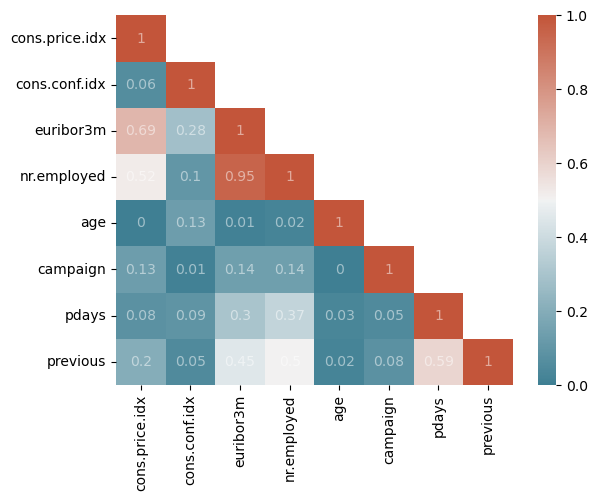

In [29]:
compute_correlation(data=data)

# Variables catégorielles

In [30]:
# def cramers_V(var1,var2) :
#     crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
#     stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
#     obs = np.sum(crosstab) # Number of observations
#     mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table

#     return (stat/(obs*mini))
# labels_categorielles = dtype_to_column[np.dtype('O')]
# vars_categorielles = data[labels_categorielles]

# # Test du V de Cramer
# rows= []

# for var1 in vars_categorielles:
#   col = []
#   for var2 in tqdm(vars_categorielles) :
#     cramers = cramers_V(vars_categorielles[var1], vars_categorielles[var2]) # V de Cramer
#     col.append(round(cramers,2)) # arrondi du résultat   
#   rows.append(col)
  
# cramers_results = np.array(rows)
# v_cramer_resultats = pd.DataFrame(cramers_results, columns = vars_categorielles.columns, 
#                                   index =vars_categorielles.columns)

# v_cramer_resultats

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
job,1.000000,0.184310,0.359867,0.152973,0.019496,0.019274,0.128894,0.111032,0.023193,0.100890,0.152768
marital,0.184310,1.000000,0.116964,0.095813,0.012527,0.006356,0.072497,0.052304,0.014685,0.037611,0.054570
education,0.359867,0.116964,1.000000,0.170849,0.018635,0.013012,0.123988,0.095856,0.023643,0.044245,0.068472
default,0.152973,0.095813,0.170849,1.000000,0.012663,0.007142,0.135731,0.112895,0.015004,0.076943,0.099354
housing,0.019496,0.012527,0.018635,0.012663,1.000000,0.707870,0.084889,0.056220,0.017643,0.018333,0.011748
loan,0.019274,0.006356,0.013012,0.007142,0.707870,1.000000,0.025189,0.024733,0.011592,0.004404,0.005154
contact,0.128894,0.072497,0.123988,0.135731,0.084889,0.025189,1.000000,0.609259,0.055783,0.242516,0.144693
month,0.111032,0.052304,0.095856,0.112895,0.056220,0.024733,0.609259,1.000000,0.068187,0.242845,0.274395
day_of_week,0.023193,0.014685,0.023643,0.015004,0.017643,0.011592,0.055783,0.068187,1.000000,0.017597,0.025195
poutcome,0.100890,0.037611,0.044245,0.076943,0.018333,0.004404,0.242516,0.242845,0.017597,1.000000,0.320488


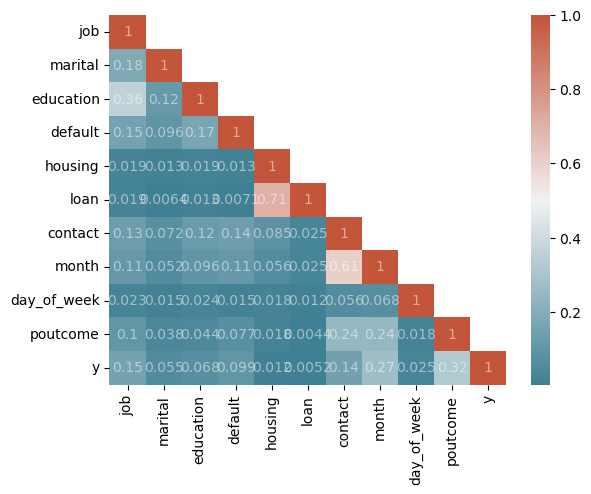

In [31]:
cramers_v_table(df=data)

In [32]:
data=categorical_variables_selection(data,testcramerV_threshold=0.75)


In [33]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

# Encodage des données 

Nous avons choisi ici de passer à un encodage ordinal au lieu d'un onehot encoding pour ne pas augmenter signficativement la dimension de l'espace des features comme c'est le cas avec le OneHot encoding étant donné quenous avons beaucoup de variables catégorielles dont certaines qui présentent plusieurs classes (par exp: les jours ou les mois)

In [34]:
data=encode(data=data,method="ordinal")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,93.994,-36.4,4.857,5191.0,0


# Normalisation des données

In [ ]:
data=normalize(data=data,columns_to_scale=[col for col in data.columns if data[col].abs().max() > 1]) #On utilise un StandardScaler ici et on scale uniquement les colonnes dont la valeur max en valeur absolue est supétrieure à 1
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1,0.762558,-0.718834,-0.565922,0.195414,-0.349494,0.192622,0.722722,0.886447,0.71246,0.33168,0
1,1.628993,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1,0.762558,-0.718834,-0.565922,0.195414,-0.349494,0.192622,0.722722,0.886447,0.71246,0.33168,0
2,-0.290186,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1,0.762558,-0.718834,-0.565922,0.195414,-0.349494,0.192622,0.722722,0.886447,0.71246,0.33168,0
3,-0.002309,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1,0.762558,-0.718834,-0.565922,0.195414,-0.349494,0.192622,0.722722,0.886447,0.71246,0.33168,0
4,1.533034,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1,0.762558,-0.718834,-0.565922,0.195414,-0.349494,0.192622,0.722722,0.886447,0.71246,0.33168,0


# Train/Test Split

Le train/test Split sera fait en 70/30